In [1]:
#hide
!pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
# Note: the steps to get a 'free' api key for this are annoying. 
# You have to create a new azure/microsoft account, put up a credit card, create a new resource group,
# deploy a new bingsearchv7 instance in azure, and then navigate to the dashbaord and find your key.

import os
from fastai.vision.all import *
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api

# see https://github.com/fastai/fastbook/blob/master/utils.py#
def search_images_bing(key, term, min_sz=128):
    client = api('https://api.cognitive.microsoft.com', auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)

In [4]:
key = os.environ['AZURE_SEARCH_KEY']

results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)


150

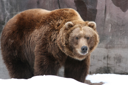

In [9]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [11]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('content_url'))

In [15]:
fns = get_image_files(path)
fns

(#423) [Path('bears/grizzly/00000038.jpg'),Path('bears/grizzly/00000004.jpg'),Path('bears/grizzly/00000005.jpg'),Path('bears/grizzly/00000011.jpg'),Path('bears/grizzly/00000039.jpg'),Path('bears/grizzly/00000007.jpg'),Path('bears/grizzly/00000012.png'),Path('bears/grizzly/00000006.jpg'),Path('bears/grizzly/00000120.gif'),Path('bears/grizzly/00000002.jpg')...]

In [16]:
# check for corrupt image files
failed = verify_images(fns)
failed

(#0) []

In [17]:
failed.map(Path.unlink);

In [22]:
# Note: to inspect/lear more about a given function, you can type ??[method_name] into a cell and run it. 
# For example:
??verify_images